In [100]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from collections import deque
from tqdm import tqdm
import pandas as pd
import copy

In [101]:
P_0_matrix=np.array([[0.1,0.9,0,0,0],
                   [0.1,0,0.9,0,0],
                   [0.1,0,0,0.9,0],
                   [0.1,0,0,0,0.9],
                   [0.1,0,0,0,0.9]])
P_0_matrix


array([[0.1, 0.9, 0. , 0. , 0. ],
       [0.1, 0. , 0.9, 0. , 0. ],
       [0.1, 0. , 0. , 0.9, 0. ],
       [0.1, 0. , 0. , 0. , 0.9],
       [0.1, 0. , 0. , 0. , 0.9]])

In [102]:
P_1_matrix=np.array([[1,0,0,0,0],
                   [1,0,0,0,0],
                   [1,0,0,0,0],
                   [1,0,0,0,0],
                   [1,0,0,0,0]])
P_1_matrix

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [103]:
action_space=[0,1]
state_space=[0,1,2,3,4]
A=0.9
reward_matrix=[[A**1,0],[A**2,0],[A**3,0],[A**4,0],[A**5,0]]
N=20
M=6
epsilon=1
subsidy=0
arm_indexes=[i for i in range(N)]
gamma=0.999

In [104]:
def step(state,state_space,action,P_0_matrix,P_1_matrix,reward_matrix):
  new_state=state
  if(action==1):
    new_state=np.random.choice(state_space,replace=True,p=P_1_matrix[state])
    reward=reward_matrix[state][1]
  else:
    new_state=np.random.choice(state_space,replace=True,p=P_0_matrix[state])
    reward=reward_matrix[state][0]
  return [new_state,reward]

In [105]:
# Q=copy.deepcopy(reward_matrix)
Q=np.zeros((len(state_space),len(action_space)))
nu=np.zeros((len(state_space),len(action_space)))
nu.shape

(5, 2)

In [106]:
Q

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [107]:


def act(Q_values,epsilon,state):
  decision=np.random.binomial(n=1,p=epsilon,size=1)
  if decision==1:
    action=random.choice([0,1])
  else:
    action=np.argmax(Q_values[state])
  return action

In [108]:
alternative_indexes=[0 for _ in range(N)]
current_state=[0 for _ in range(N)]

In [109]:
rewards=[]
subsidies=[]
action_sums=[]
betas=[]
alphas=[]
epsilon=0.01


In [110]:
def alpha(i):
    return 0.02
    # return 1/(1+(i/10000))


In [111]:
for i in range(1,500001):
  # top_M_indices=act(alternative_indexes,N,M,epsilon)
  action_sum=0
  reward_sum=0
  # alpha=1/(1+(i/500))

  # if i%50==0:
  #   beta=1/(1+np.ceil((i)*np.log(i)/10000))
  # else:
  #   beta=0
  beta=0.005
  action_sum_flag=0
  
  for index in arm_indexes:
      # action=np.argmax(Q_values[index][current_state[index]])
      action=act(Q,epsilon,current_state[index])
      # if i%5000==0:
      #    action=0
      action_sum+=action

      
      x=step(current_state[index],state_space,action,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      
      if action==1:
        Q[current_state[index]][action]=(1-alpha(nu[current_state[index],action]))*(Q[current_state[index]][action])+alpha(nu[current_state[index],action])*(reward+max(Q[new_state])-(np.array(Q).sum())/10)
      else:
        Q[current_state[index]][action]=(1-alpha(nu[current_state[index],action]))*(Q[current_state[index]][action])+alpha(nu[current_state[index],action])*(reward+subsidy+max(Q[new_state])-(np.array(Q).sum())/10)
      nu[current_state[index],action]=nu[current_state[index],action]+1
      current_state[index]=new_state
      reward_sum+=reward
      
      #print(x)
  # print(i)
  #print(reward_sum)
  subsidy+=beta*(action_sum-M)/N
  subsidies.append(subsidy)
#   if i%mod==0:
#      epsilon=1
#   else:
#      epsilon=0
#   epsilon=epsilon*gamma
#   if epsilon<=0.01:
#     epsilon=0.01
#   if i%10000==0:
#      mod=mod+1
  # if i==1000001:
  #    epsilon=0.001
  rewards.append(reward_sum)
  action_sums.append(action_sum)
  betas.append(beta)
  alphas.append(alpha)








In [112]:
Q

array([[0.39950993, 0.19886401],
       [0.25140203, 0.19811497],
       [0.1673853 , 0.19547969],
       [0.10956714, 0.19212463],
       [0.17229221, 0.19665292]])

In [113]:
epsilon

0.01

In [114]:
nu.sum()/N

500000.0

Text(0.5, 1.0, 'Subsidy vs Steps for Restart Example')

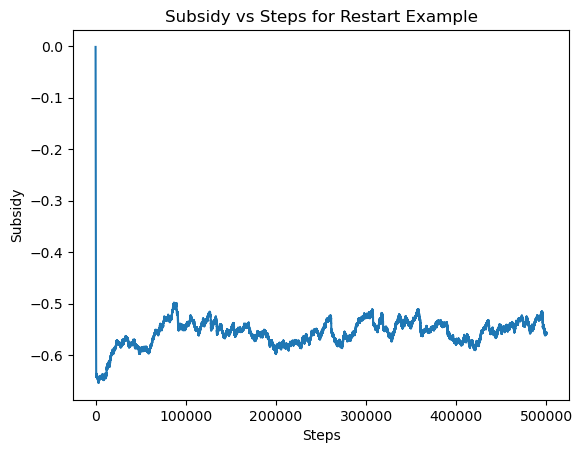

In [115]:
plt.plot(subsidies)
plt.xlabel('Steps')
plt.ylabel('Subsidy')
plt.title('Subsidy vs Steps for Restart Example')

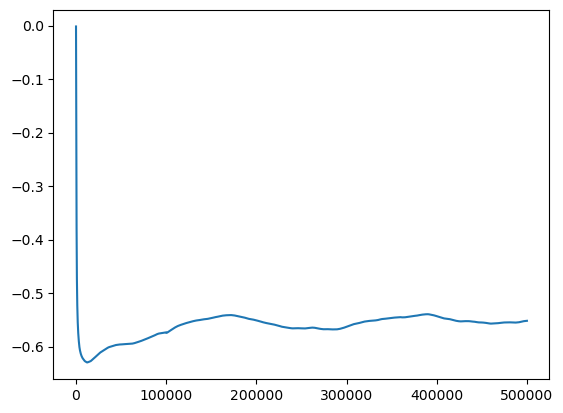

In [116]:
df_temp=pd.DataFrame(subsidies)
plt.plot(df_temp[0].rolling(100000,min_periods=1).mean())



In [117]:
x=list(df_temp[0].rolling(10,min_periods=1).mean())


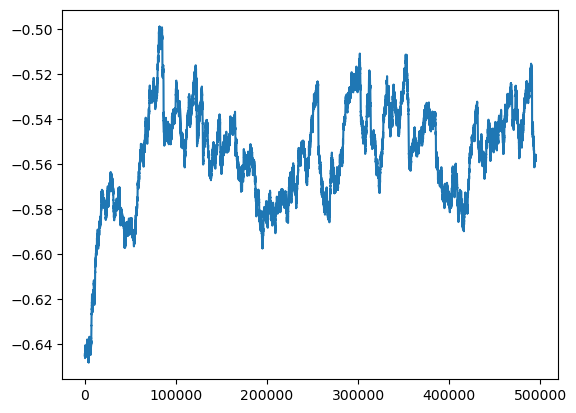

In [118]:
plt.plot(x[5000:])

In [119]:
min(subsidies)

-0.6539999999999911

In [120]:
subsidies[-3]

-0.5579999999996235

In [121]:
df=pd.DataFrame(rewards)


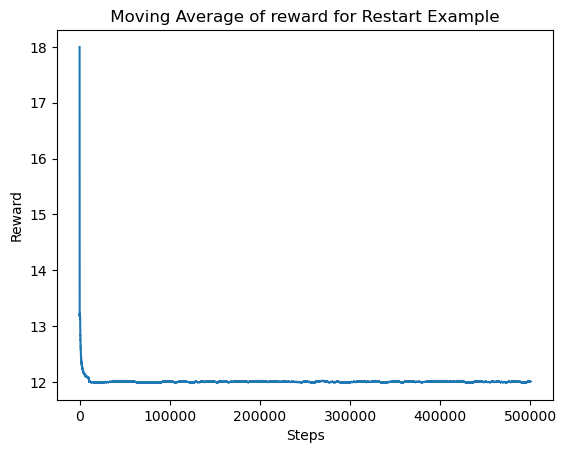

In [122]:
plt.plot(df[0].rolling(10000,min_periods=1).mean())
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title(' Moving Average of reward for Restart Example ')
plt.savefig('Moving Average of reward for Restart Example.png')

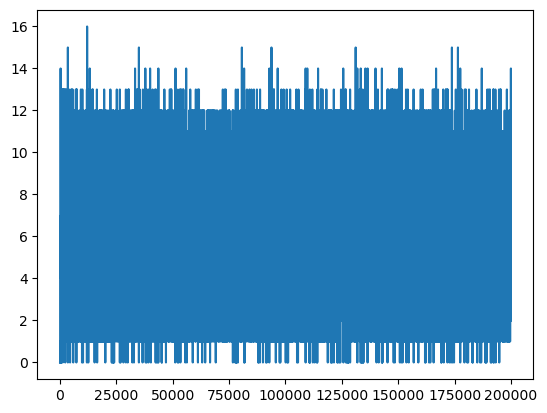

In [123]:
plt.plot(action_sums[:200000])

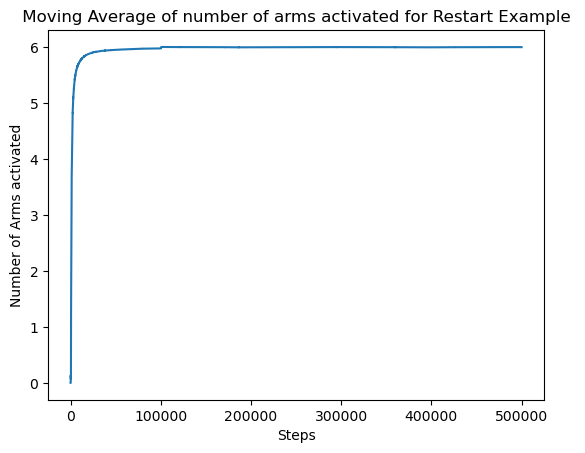

In [124]:
df['action_sums']=action_sums
plt.plot(df['action_sums'].rolling(100000,min_periods=1).mean())
plt.xlabel('Steps')
plt.ylabel('Number of Arms activated')
plt.title(' Moving Average of number of arms activated for Restart Example ')
plt.savefig('Moving Average of number of arms activated for Restart Example.png')

In [125]:
for x in Q:
  print(x[1]-x[0])

-0.20064591306666069
-0.05328706761884161
0.02809438698079461
0.08255748395975135
0.024360708484204296


In [126]:
#using learnt indices
current_state=[0 for _ in range(N)]
actual_whittle_indexes=[-0.9,-0.73,-0.5,-0.26,-0.01]
reward_sums_alt_index=[]
reward_sums_whittle_index=[]
alternative_indexes=[0 for _ in range(N)]
for i in range(1,10001):
  reward_sum_alt_index=0
  reward_sum_whittle_index=0
  for index in arm_indexes:
    alternative_indexes[index]=Q[current_state[index]][1]-Q[current_state[index]][0]
  indices_to_pull = sorted(range(len(alternative_indexes)), key = lambda j: alternative_indexes[j])[-M:]
  for index in arm_indexes:
    if index in indices_to_pull:
      x=step(current_state[index],state_space,1,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_alt_index+=reward
    else:
      x=step(current_state[index],state_space,0,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_alt_index+=reward
  reward_sums_alt_index.append(reward_sum_alt_index)


In [127]:
whittle_index_arms=[0 for _ in range(N)]
current_state=[0 for _ in range(N)]
for i in range(1,10001):
  reward_sum_whittle_index=0
  for index in arm_indexes:
    whittle_index_arms[index]=actual_whittle_indexes[current_state[index]]
  #print(whittle_index_arms)
  indices_to_pull = sorted(range(len(whittle_index_arms)), key = lambda j: whittle_index_arms[j])[-M:]
  # print(indices_to_pull)
  for index in arm_indexes:
    if index in indices_to_pull:
      x=step(current_state[index],state_space,1,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_whittle_index+=reward
    else:
      x=step(current_state[index],state_space,0,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_whittle_index+=reward
  reward_sums_whittle_index.append(reward_sum_whittle_index)

Text(0.5, 1.0, ' Moving Average of reward for Restart Example ')

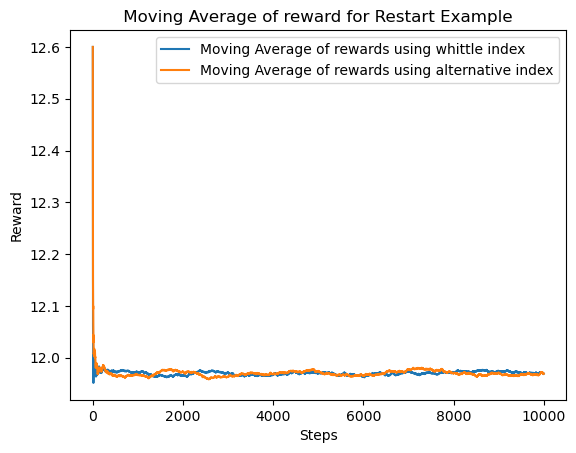

In [128]:
df=pd.DataFrame()
df['reward_whittle']=reward_sums_whittle_index
df['reward_alternate']=reward_sums_alt_index

plt.plot(df['reward_whittle'][:50000].rolling(1000,min_periods=1).mean(),label='Moving Average of rewards using whittle index')
plt.plot(df['reward_alternate'][:50000].rolling(1000,min_periods=1).mean(),label='Moving Average of rewards using alternative index')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.title(' Moving Average of reward for Restart Example ')